In [1]:
import neuralprocesses.torch as nps
import torch

import matplotlib.pyplot as plt

In [6]:
generator = nps.MixtureGPGenerator(dtype=torch.float32, mean_diff=10.)
batch = generator.generate_batch()

In [12]:
batch = generator.generate_batch()

x, y = batch["contexts"][0]

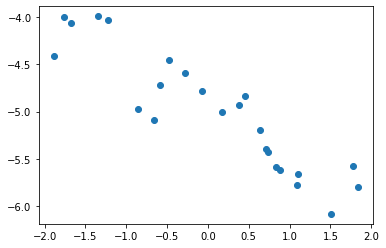

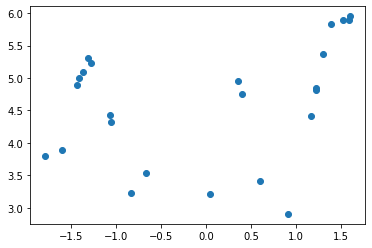

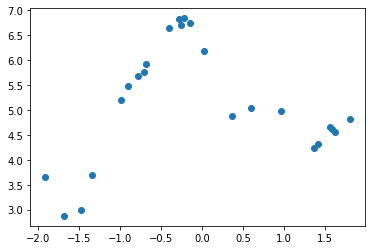

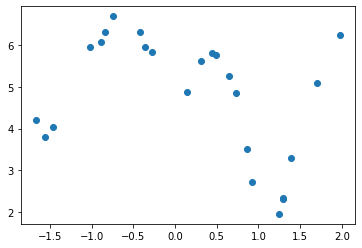

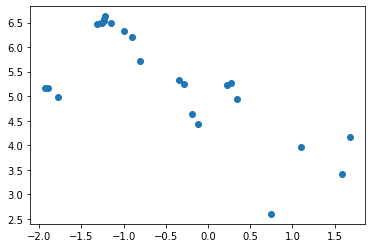

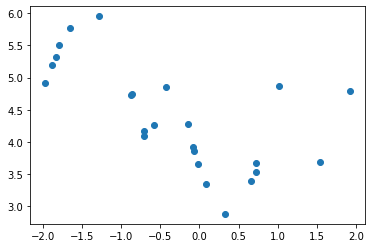

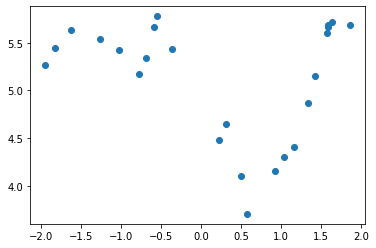

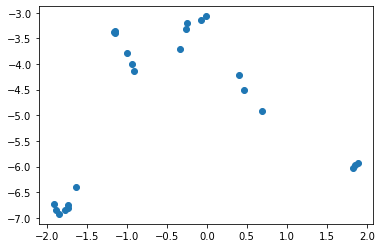

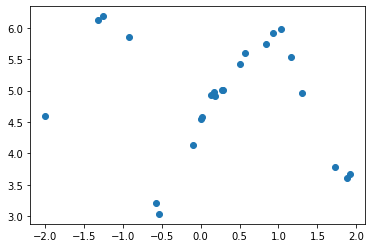

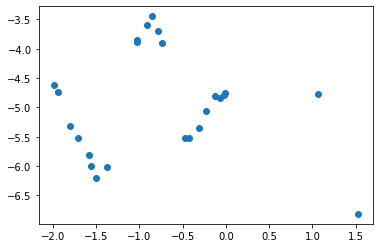

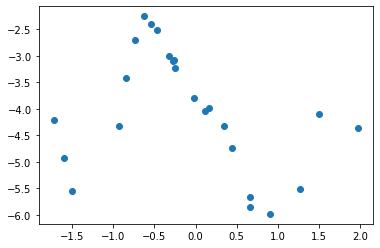

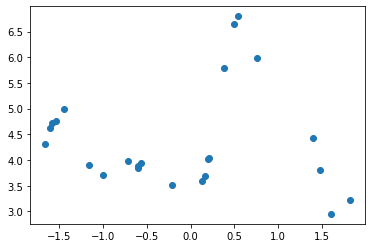

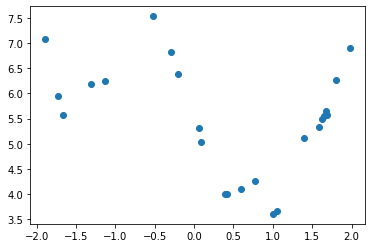

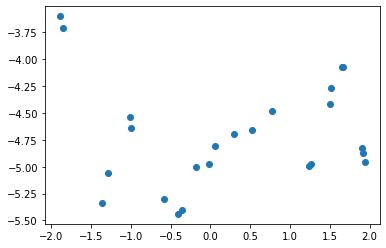

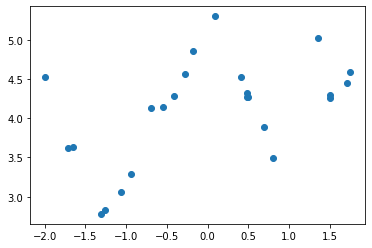

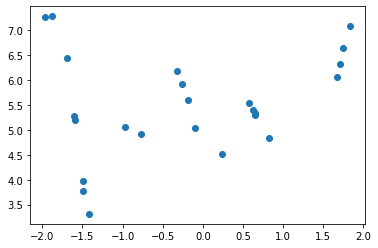

In [13]:
for i in range(16):

    plt.scatter(x[i, 0, :].T, y[i, 0, :].T)
    plt.show()